In [3]:
from mmml import *

In [4]:
from pathlib import Path

dir_ = Path("/scicore/home/meuwly/boitti0000/mmml/examples/co2/dcmnet_physnet_train/comparisons/interactive_comparison/")

In [10]:
def load_hists(p):
    h1 = p / "noneq_model" / "history.json"
    h2 = p / "dcmnet_equivariant" / "history.json"
    import json
    from pprint import pprint
    h1 = json.load(open(h1))
    h2 = json.load(open(h2))
    return h1, h2

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plots(h1, h2, model1_name="NEQ", model2_name="EQ", key=""):
    # --- Model names ---
    if model1_name is None:
        model1_name = "Model A"  # e.g., "SE(3)-MPNN"
    if model2_name is None:
        model2_name = "Model B"  # e.g., "kMDCM"
    
    # --- Okabe–Ito color palette (colorblind-friendly) ---
    colors = {
        "black":  "#000000",  # loss
        "blue":   "#0072B2",  # energy
        "orange": "#E69F00",  # forces
        "green":  "#009E73",  # dipole
        "purple": "#CC79A7",  # ESP
    }
    
    fig, ax1 = plt.subplots(figsize=(11, 6))
    ALPHA = 0.9
    # =========================
    #  LEFT Y — LOSS (shared)
    # =========================
    ax1.plot(np.log(h1["train_loss"]), color=colors["black"], alpha=ALPHA, linestyle='-',  label=f'Train Loss ({model1_name})')
    ax1.plot(np.log(h2["train_loss"]), color=colors["black"], alpha=ALPHA, linestyle='--', label=f'Train Loss ({model2_name})')
    ax1.plot(np.log(h1["val_loss"]),   color=colors["black"], alpha=ALPHA, linestyle='-.', label=f'Val Loss ({model1_name})')
    ax1.plot(np.log(h2["val_loss"]),   color=colors["black"], alpha=ALPHA, linestyle=':',  label=f'Val Loss ({model2_name})')
    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('log(Loss)', color=colors["black"])
    ax1.tick_params(axis='y', labelcolor=colors["black"], labelbottom=True)
    ax1.grid(True, alpha=0.25, linewidth=0.8)
    fig.savefig(f"{key}_loss_.pdf")
    
    fig, ax1 = plt.subplots(figsize=(11, 6))
    ALPHA = 0.09
    # =========================
    #  LEFT Y — LOSS (shared)
    # =========================
    ax1.plot(np.log(h1["train_loss"]), color=colors["black"],  alpha=ALPHA, linestyle='-',  label=f'Train Loss ({model1_name})')
    ax1.plot(np.log(h2["train_loss"]), color=colors["black"],  alpha=ALPHA, linestyle='--', label=f'Train Loss ({model2_name})')
    ax1.plot(np.log(h1["val_loss"]),   color=colors["black"], alpha=ALPHA, linestyle='-.', label=f'Val Loss ({model1_name})')
    ax1.plot(np.log(h2["val_loss"]),   color=colors["black"], alpha=ALPHA, linestyle=':',  label=f'Val Loss ({model2_name})')
    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('log(Loss)', color=colors["black"])
    ax1.tick_params(axis='y', labelcolor=colors["black"], labelbottom=True)
    ax1.grid(True, alpha=0.25, linewidth=0.8)
    
    # Helper to add a new right-side axis for a metric
    def add_metric_axis(base_ax, offset, color, key, pretty_name):
        ax = base_ax.twinx()
        if offset:
            ax.spines['right'].set_position(('outward', offset*2))
        # Plot h1/h2 with consistent styles for models
        ax.plot(np.log(h1[key]), color=color, linestyle='-',  label=f'{pretty_name} ({model1_name})')
        ax.plot(np.log(h1[key]), color=color, label=f'{pretty_name} ({model1_name})')
        ax.plot(np.log(h2[key]), color=color, linestyle='--', label=f'{pretty_name} ({model2_name})')
        ax.set_ylabel(f'log({pretty_name})', color=color)
        ax.tick_params(axis='y', labelcolor=color)
        return ax
    
    # =========================
    #  ONE RIGHT AXIS PER MAE
    # =========================
    # Stagger outward so labels don't overlap
    ax_energy = add_metric_axis(ax1,  0,  colors["blue"],   "val_energy_mae", "MAE: Energy")
    ax_forces = add_metric_axis(ax1, 40,  colors["orange"], "val_forces_mae", "MAE: Forces")
    ax_dipole = add_metric_axis(ax1, 80,  colors["green"],  "val_dipole_mae", "MAE: Dipole")
    ax_esp    = add_metric_axis(ax1, 120, colors["purple"], "val_esp_mae",    "MAE: ESP")
    
    # =========================
    #  LEGEND (combine all axes)
    # =========================
    lines, labels = [], []
    for a in [ax1, ax_energy, ax_forces, ax_dipole, ax_esp]:
        l, lab = a.get_legend_handles_labels()
        lines.extend(l); labels.extend(lab)
    
    # De-duplicate legend entries while preserving order
    seen = set()
    uniq_lines, uniq_labels = [], []
    for line, lab in zip(lines, labels):
        if lab not in seen:
            uniq_lines.append(line)
            uniq_labels.append(lab)
            seen.add(lab)
    
    legend = fig.legend(uniq_lines, uniq_labels,
               loc='upper left', bbox_to_anchor=(0.381, 0.70),
               fontsize=8, frameon=False)
    
    fig.savefig(f"{key}_loss.pdf")
    
    # legend.set_visible(False)
    fig.axes[0].set_ylim(-2,0)
    fig.axes[1].set_ylim(-3,-2)
    fig.axes[2].set_ylim(-5,-1)
    fig.axes[3].set_ylim(-4,-2)
    fig.axes[4].set_ylim(-5.6,-5)

    for _ in fig.axes:
        _.set_xlim(400, 1000)
    fig.savefig(f"{key}_loss_zoom.pdf")
    return fig


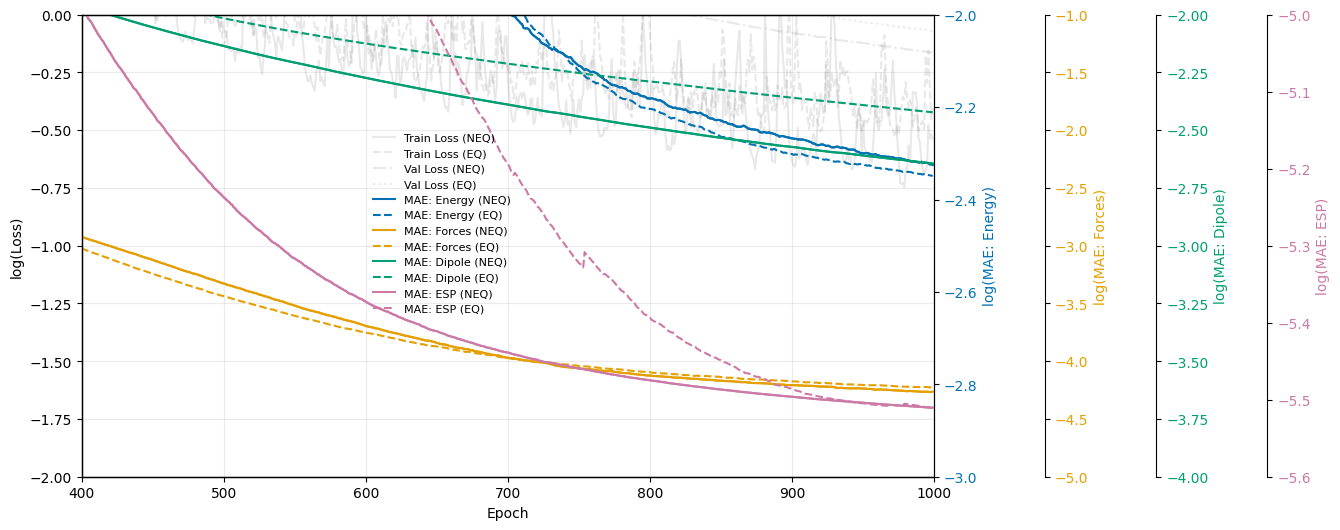

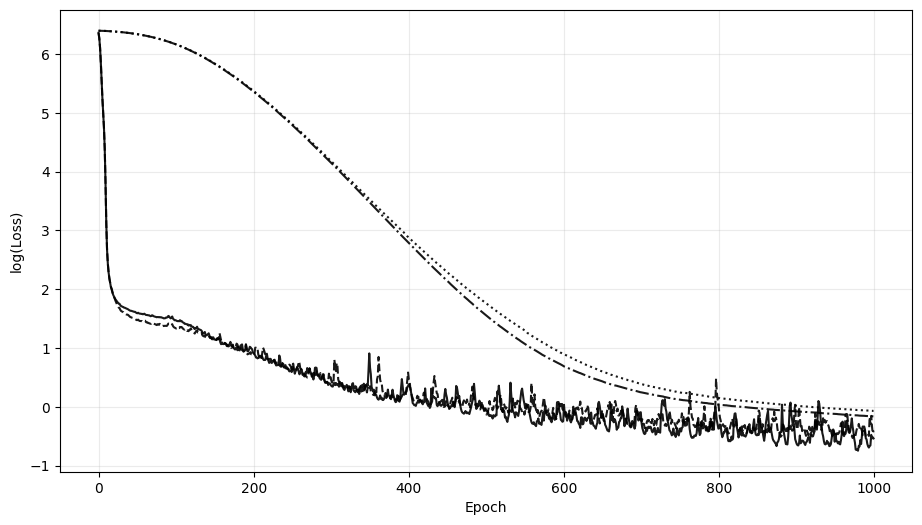

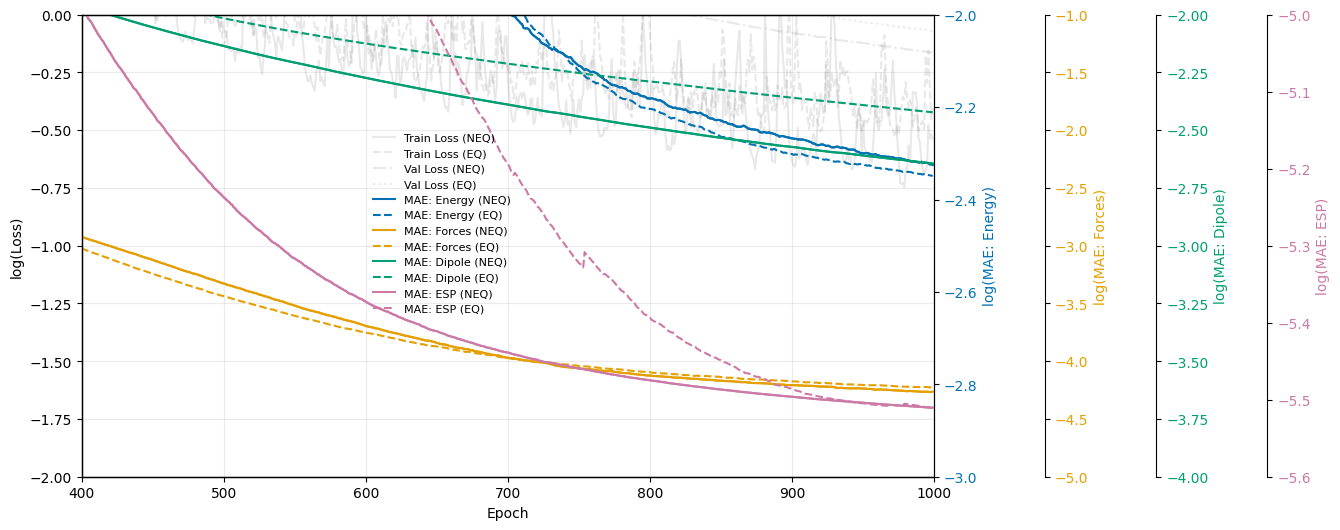

In [56]:
p = dir_ = Path("/scicore/home/meuwly/boitti0000/mmml/examples/co2/dcmnet_physnet_train/comparisons/interactive_comparison2/")
plots(*load_hists(p), key="test2")

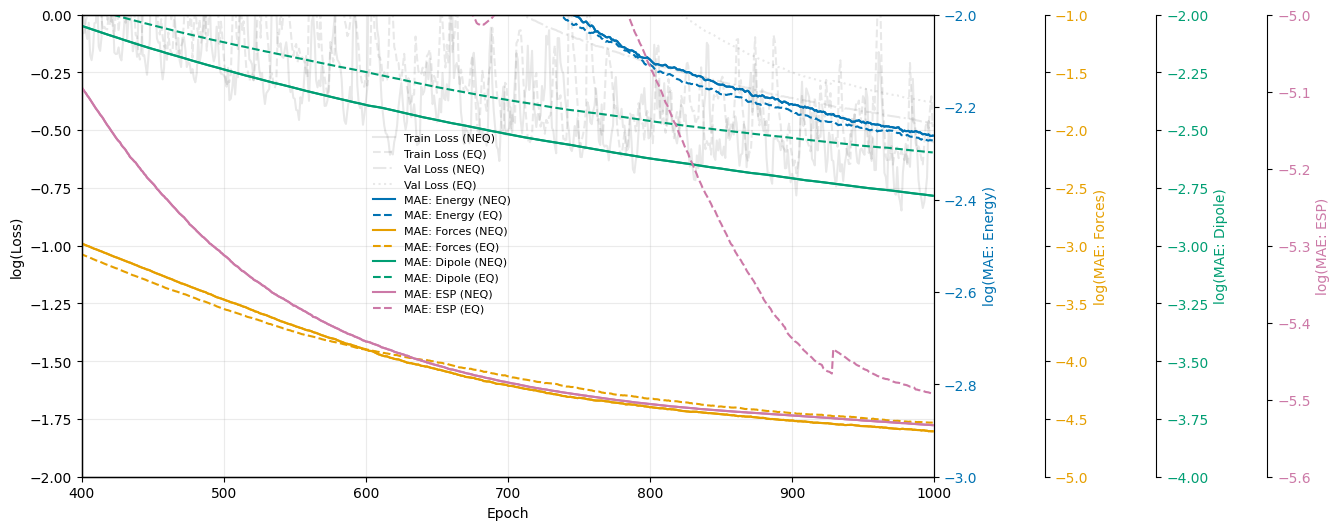

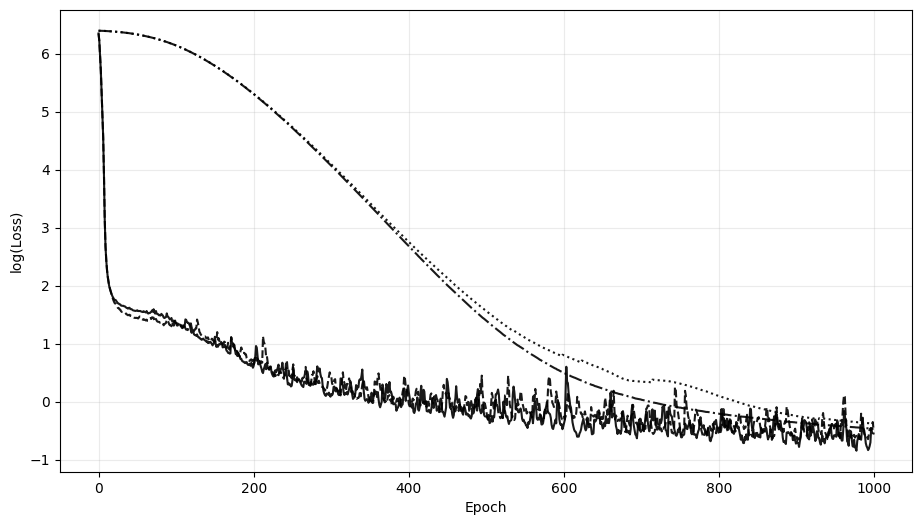

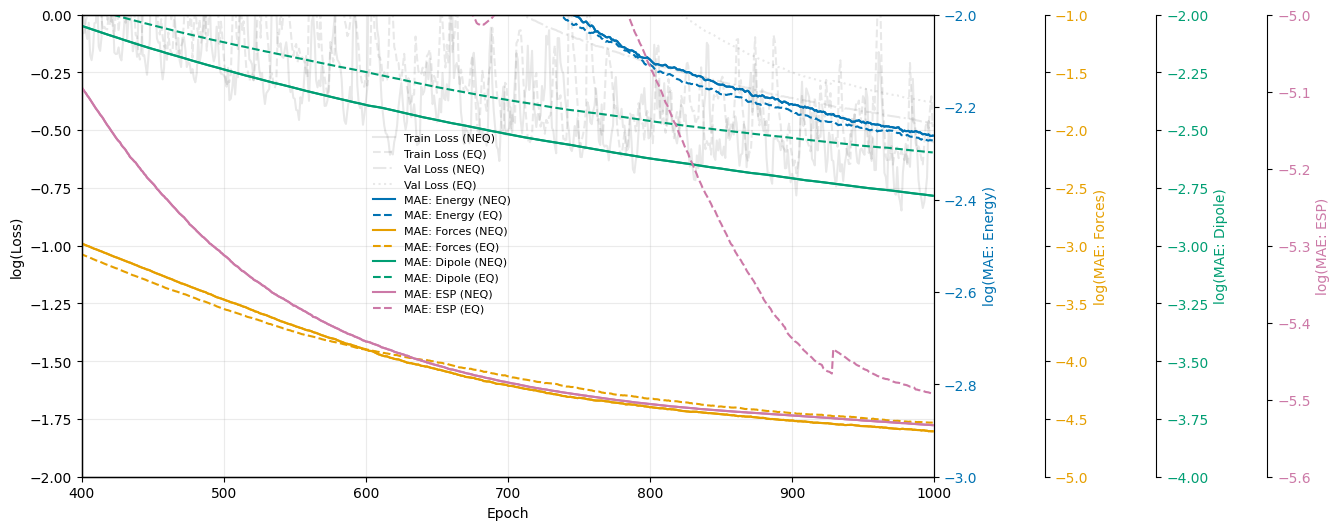

In [57]:

p = dir_ = Path("/scicore/home/meuwly/boitti0000/mmml/examples/co2/dcmnet_physnet_train/comparisons/interactive_comparison3/")
plots(*load_hists(p), key="test3")

In [1]:
import matplotlib.pyplot as plt
import numpy as np